# Min-Max Scaler

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

<Axes: xlabel='Alcohol', ylabel='Density'>

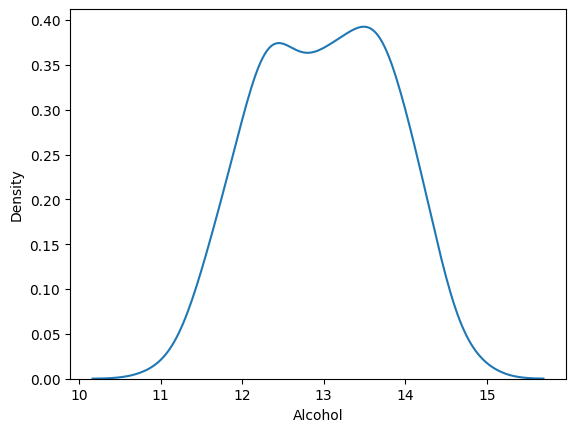

In [3]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

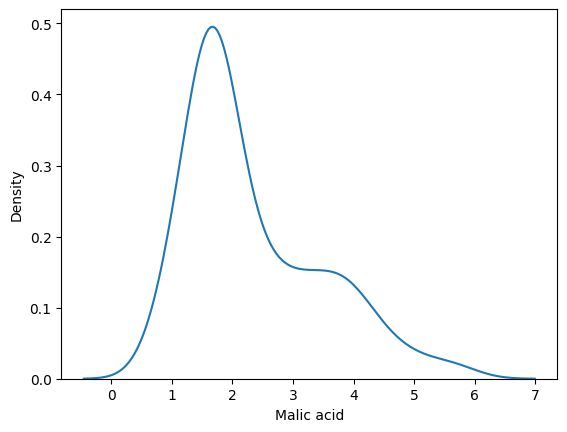

In [5]:
sns.kdeplot(df['Malic acid'])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

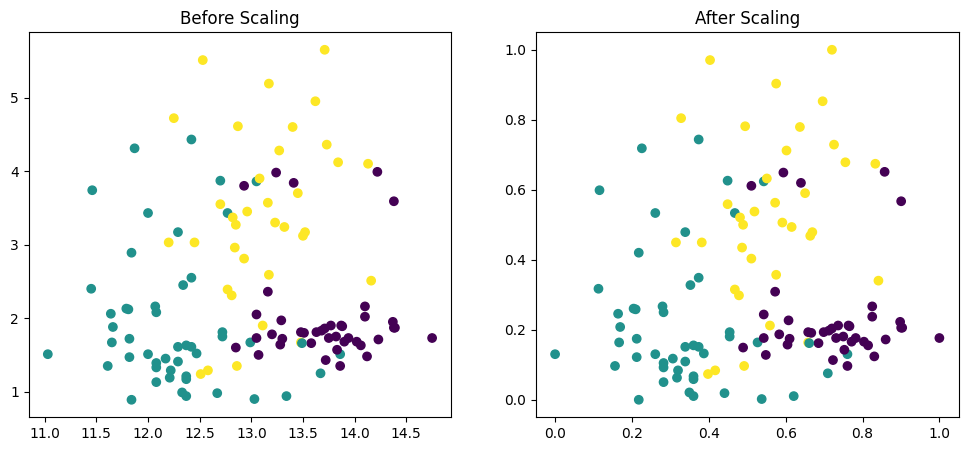

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

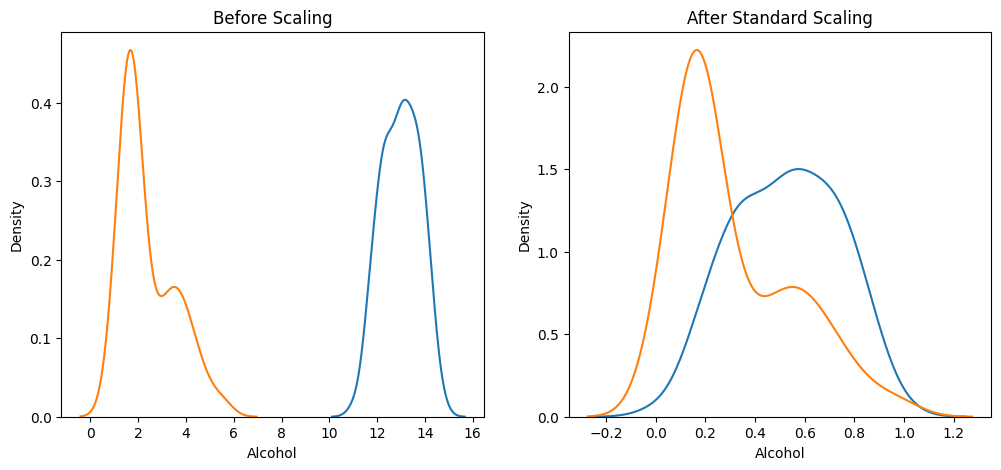

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

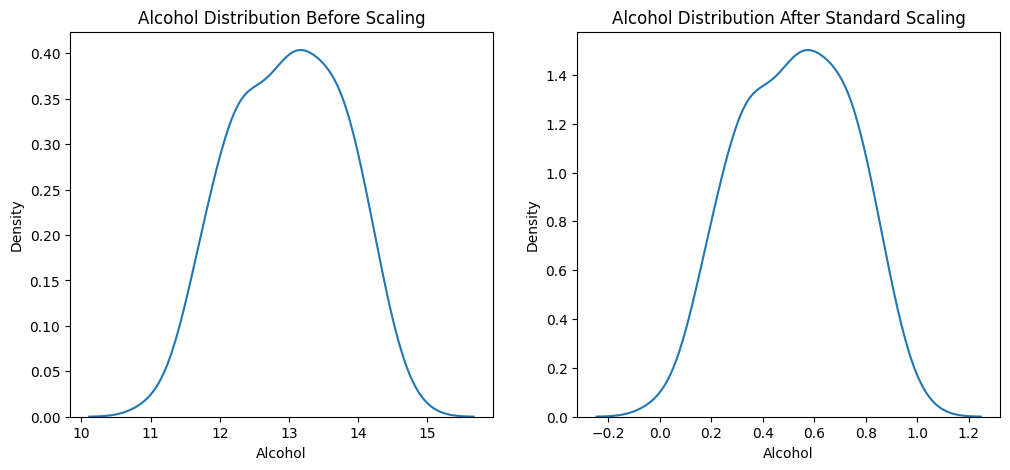

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

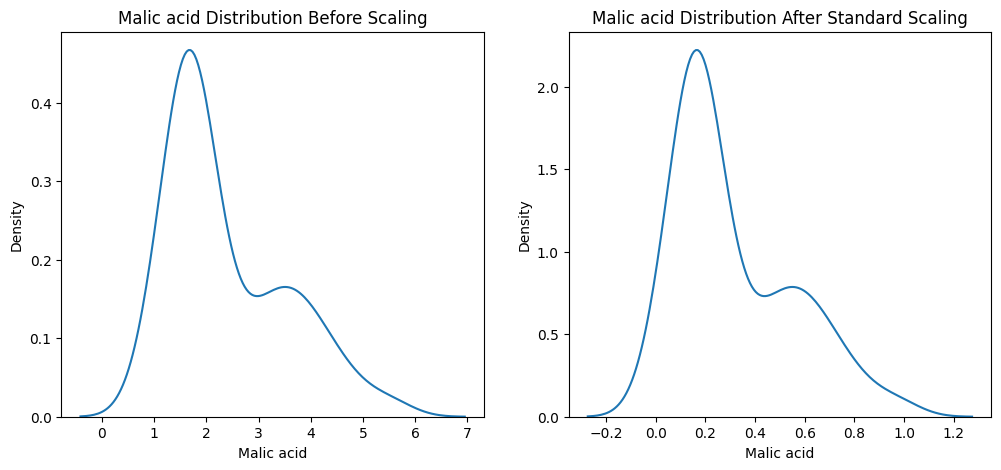

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Robust Scaling

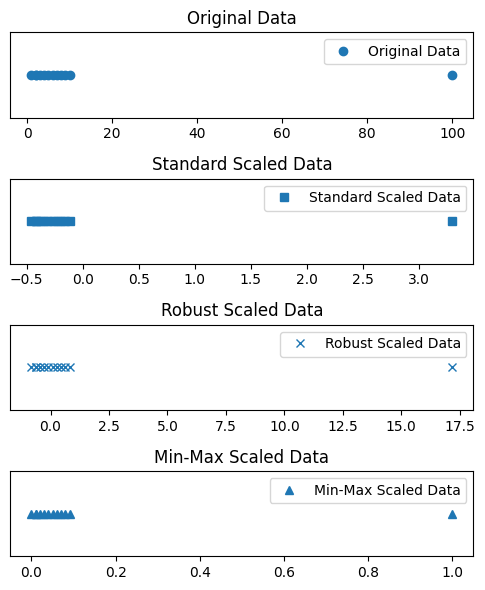

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Generating a simple dataset with an outlier
data = np.array([1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]).reshape(-1, 1)

# Applying StandardScaler
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Applying RobustScaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)

# Applying MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(5, 6))

# Original Data
axs[0].plot(data, np.zeros_like(data), 'o', label='Original Data')
axs[0].set_yticks([])
axs[0].set_title("Original Data")
axs[0].legend()

# Standard Scaled Data
axs[1].plot(data_standard_scaled, np.zeros_like(data_standard_scaled), 's', label='Standard Scaled Data')
axs[1].set_yticks([])
axs[1].set_title("Standard Scaled Data")
axs[1].legend()

# Robust Scaled Data
axs[2].plot(data_robust_scaled, np.zeros_like(data_robust_scaled), 'x', label='Robust Scaled Data')
axs[2].set_yticks([])
axs[2].set_title("Robust Scaled Data")
axs[2].legend()

# Min-Max Scaled Data
axs[3].plot(data_minmax_scaled, np.zeros_like(data_minmax_scaled), '^', label='Min-Max Scaled Data')
axs[3].set_yticks([])
axs[3].set_title("Min-Max Scaled Data")
axs[3].legend()

plt.tight_layout()
plt.show()


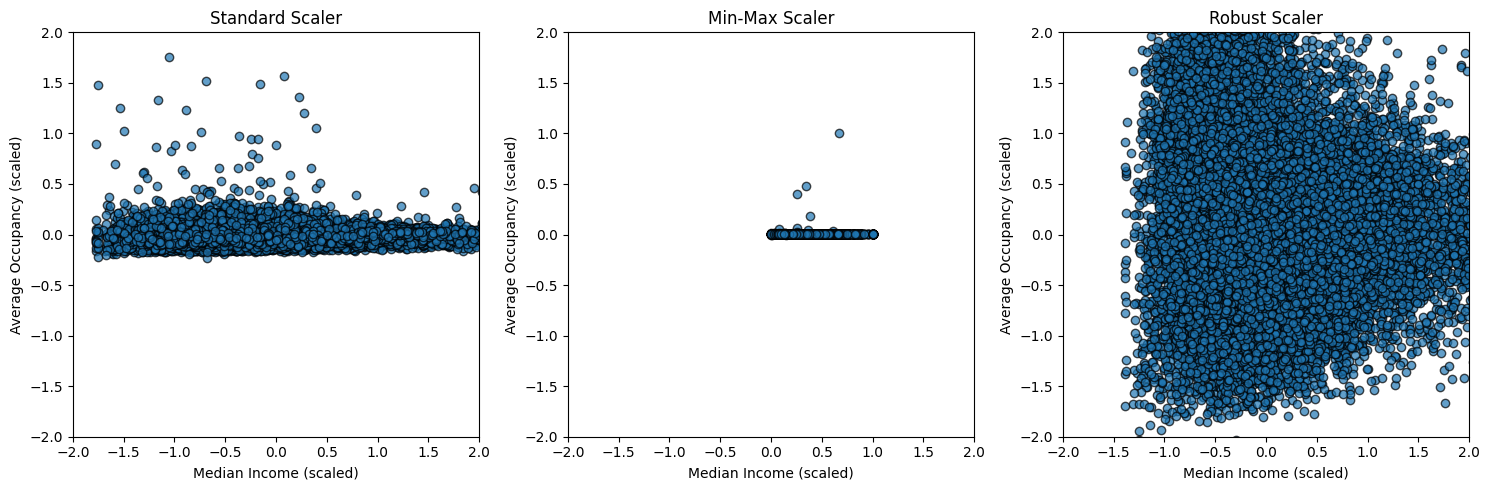

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Fetching the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Selecting the features "MedInc" and "AveOccup"
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

# Scaling the data using Standard Scaler, Min-Max Scaler, and Robust Scaler
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Plotting the original and scaled data
plt.figure(figsize=(15, 5))
for i, (name, scaler) in enumerate(scalers.items(), 1):
    X_scaled = scaler.fit_transform(X)

    plt.subplot(1, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], edgecolor='k', alpha=0.7)
    plt.title(f'{name}')
    plt.xlabel('Median Income (scaled)')
    plt.ylabel('Average Occupancy (scaled)')
    plt.xlim(-2, 2)  # Limiting x-axis to exclude outliers
    plt.ylim(-2, 2)  # Limiting y-axis to exclude outliers

plt.tight_layout()
plt.show()


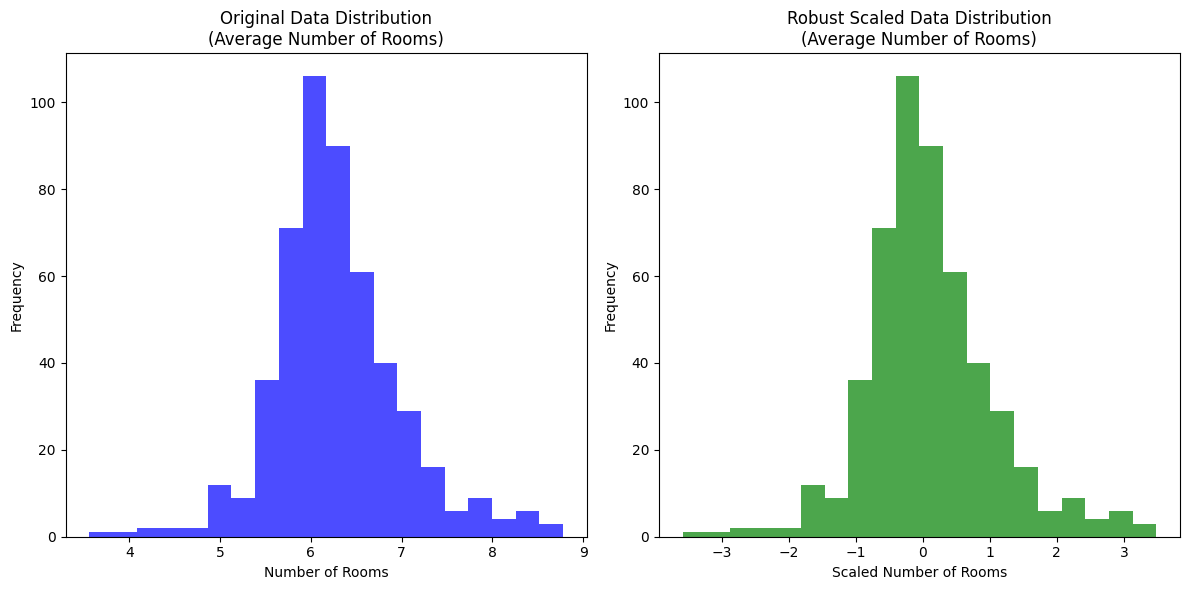

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Select a single feature for demonstration, for example, 'rm' (average number of rooms per dwelling)
feature_data = df['rm'].values

# Apply RobustScaler to the selected feature
scaler = RobustScaler()
feature_scaled = scaler.fit_transform(feature_data.reshape(-1, 1)).flatten()

# Plotting the original and scaled data distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_data, bins=20, color='blue', alpha=0.7)
plt.title('Original Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(feature_scaled, bins=20, color='green', alpha=0.7)
plt.title('Robust Scaled Data Distribution\n(Average Number of Rooms)')
plt.xlabel('Scaled Number of Rooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
